# Image recognition with MNIST dataset

## Import MNIST dataset and visualize the dataset

In [ ]:
# Import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Load MNIST dataset from tensorflow
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
print('Train data shape:', X_train.shape, y_train.shape)
print('Test data shape:', X_test.shape, y_test.shape)

#Count number of unique train labels:
train_unique,train_counts = np.unique(y_train, return_counts=True)
print('Train labels:', dict(zip(train_unique,train_counts)))

#Count number of unique train labels:
test_unique,test_counts = np.unique(y_test, return_counts=True)
print('Test labels:', dict(zip(test_unique,test_counts)))

Train data shape: (60000, 28, 28) (60000,)
Test data shape: (10000, 28, 28) (10000,)
Train labels: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Test labels: {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count plot for each digit from 0 to 9 in test dataset')

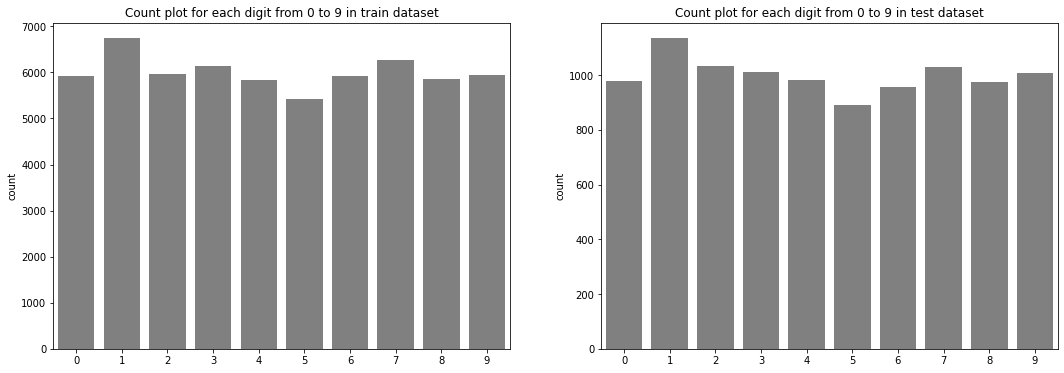

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (18, 6))
sns.countplot(y_train,color = 'grey',ax=ax1)
ax1.set_title('Count plot for each digit from 0 to 9 in train dataset')

sns.countplot(y_test,color = 'grey',ax=ax2)
ax2.set_title('Count plot for each digit from 0 to 9 in test dataset')

Test and train dataset has similar distribution and equally distributed

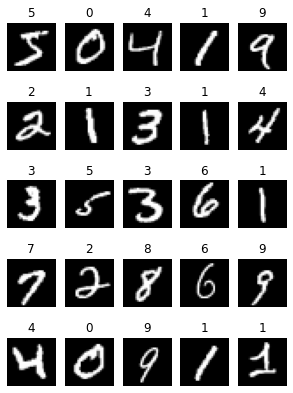

In [ ]:
# Display the first 25 image in training dataset:
plt.figure(figsize=(5,7))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_train[i], cmap='gray') 
  plt.title(y_train[i])
  plt.axis('off')

In [ ]:
#Check the type of train and test data    
print('Type of train data:',type(X_train))
print('Type of test data:',type(X_train))

Type of train data: <class 'numpy.ndarray'>
Type of test data: <class 'numpy.ndarray'>


In [ ]:
#Number of digits in dataset:
n_labels = np.unique(y_train)
print('There are {} numbers to detect from the dataset'.format(len(n_labels)))
print(n_labels)

There are 10 numbers to detect from the dataset
[0 1 2 3 4 5 6 7 8 9]


## Transform data for NNs model

### One-hot encoding

Use tensorflow.keras.utils.to_categorical to converts a class vector (integers) to binary class matrix. Here, we will use it to convert our labels to a binary matrix with column values are 0 everywhere except for the index of the digit class.

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
print('Train data shape after one-hot encoding:', y_train.shape)
print('Test data shape after one-hot encoding:', y_test.shape)

Train data shape after one-hot encoding: (60000, 10)
Test data shape after one-hot encoding: (10000, 10)


### Flatten images and normalization

In [ ]:
X_train.shape

(60000, 28, 28)

Image is typically seen as a matrix has always 3 dimensions: channels (color for each pixel), width and height of the image. Here, we will need to do the following tasks to prepare the data for NNs model:

*   Flatten the image to 1-D vector for the multilayer perceptions (MLPs), which typically known as the feedforward neural networks
*   Normalize the data with each pixel value with the original value of 0-255 to 0-1 values




In [ ]:
#Flatten the images:
size = X_train.shape[1]*X_train.shape[2]
X_train = np.reshape(X_train, [-1,size])
X_test = np.reshape(X_test, [-1,size])

print('Train data shape:', X_train.shape)
print('Test data shape:', X_test.shape)
#help(np.reshape)

Train data shape: (60000, 784)
Test data shape: (10000, 784)


In [ ]:
#Normalize the data from 0-255 to 0-1:
print('Data before normalization is ranged from {} to {}'.format(X_train[0].min(),X_train[0].max()))
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

Data before normalization is ranged from 0 to 255


In [ ]:
print('Train data after normalization is ranged from {} to {}'.format(X_train[0].min(),X_train[0].max()))
print('Test data after normalization is ranged from {} to {}'.format(X_train[0].min(),X_train[0].max()))

Train data after normalization is ranged from 0.0 to 1.0
Test data after normalization is ranged from 0.0 to 1.0


## Feed forward neural networks model (multilayer perceptrons-mlp)

### Network hyperparameter

* Batch size: number of samples to work through before updating the internal model parameters. Smaller batch size will cause a longer training time but can prevent the overfitting issue since only part of the training dataset is seen. Common values equal to $2^n$ such as 32, 64, 128
* Epoch:  number times that the learning algorithm will work through the entire training dataset. Increase number of epoch will improve the model but can lead to the overfitting problems
* Number of neurons per layer and number of hidden layer: Here, there will be only 1 hidden layer with 784 neurons corresponding to the input size.
* Dropout layer is a regularization method to turned off some neurons randomly with the dropout rate assumed to be 40%, meaning that there are 40% chances turned off randomly


In [ ]:
#Model parameters:
n_batch_size = 128
n_neurons = 128
dropout_rate =0.4 
n_epoch = 500

### Model architecture

1. Three layers: input with 784 neurons, hidden layer with 128 neurons, and output layer with 10 neurons. This is approximated based on the number of features and number of labels.
2. Dropout layer is added to in first and second layer to regularize the model and prevent overfitting. The dropout rate is assumed to 0.4
3. Rectified Linear Unit (ReLU) is implemented in first and second layers which can help reduce the vanishing gradient problems. For the last layer, softmax is used to return an array of probability scores (summing to 1). Each score will be the probability that the current digit image belongs to one of our 10 digit classes.
4. Loss function used in here is the categorical cross-entropy to compute the error between the true classes and predicted classes. The labels are given in an one_hot format
5. Optimizer used here is the adam (adaptive moments) with adaptive learning rates

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
#Specify callback criteria
early_stop = EarlyStopping(monitor='val_loss', mode='min',verbose = 1, patience = 25)


In [ ]:
model = Sequential()

model.add(Dense(784, activation = 'relu')) #784 is number of 'features' 
model.add(Dropout(rate = dropout_rate))

model.add(Dense(n_neurons, activation = 'relu'))
model.add(Dropout(rate = dropout_rate))

#multiclassification 
model.add(Dense(10, activation = 'softmax')) #10 is number of labels: 0-9

model.compile(loss = 'CategoricalCrossentropy', optimizer='adam') 

### Model summary and view

In [ ]:
#model.summary()

In [ ]:
from keras.utils import plot_model

In [ ]:
#plot_model(model, to_file='mlp_model_mnist.png', show_shapes=True)

### Train the model

In [ ]:
model.fit(X_train, y_train, epochs=n_epoch, batch_size= n_batch_size
          , validation_data = (X_test,y_test)
          , callbacks=[early_stop])

Epoch 1/500
469/469 [==============================] - 9s 17ms/step - loss: 0.3338 - val_loss: 0.1252
Epoch 2/500
469/469 [==============================] - 9s 19ms/step - loss: 0.1466 - val_loss: 0.0833
Epoch 3/500
469/469 [==============================] - 8s 17ms/step - loss: 0.1091 - val_loss: 0.0800
Epoch 4/500
469/469 [==============================] - 8s 17ms/step - loss: 0.0895 - val_loss: 0.0722
Epoch 5/500
469/469 [==============================] - 8s 17ms/step - loss: 0.0765 - val_loss: 0.0680
Epoch 6/500
469/469 [==============================] - 9s 20ms/step - loss: 0.0673 - val_loss: 0.0625
Epoch 7/500
469/469 [==============================] - 8s 17ms/step - loss: 0.0615 - val_loss: 0.0591
Epoch 8/500
469/469 [==============================] - 8s 17ms/step - loss: 0.0559 - val_loss: 0.0633
Epoch 9/500
469/469 [==============================] - 8s 17ms/step - loss: 0.0510 - val_loss: 0.0605
Epoch 10/500
469/469 [==============================] - 8s 17ms/step - loss: 0.046

### Model evaluation 

In [ ]:
#Compute the loss function
losses = pd.DataFrame(model.history.history)

Text(0, 0.5, 'Loss')

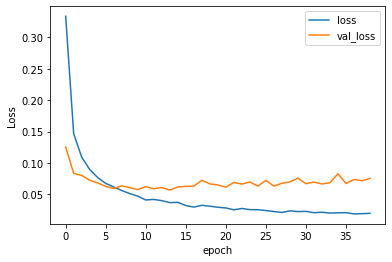

In [ ]:
losses.plot()
plt.xlabel('epoch')
plt.ylabel('Loss')

In [ ]:
# Compute predicted values based on the X_test:
y_predict = np.argmax(model.predict(X_test),axis=1)

313/313 [==============================] - 1s 4ms/step


In [ ]:
#Convert one-hot encode to 1D vector of labels
y_test_list = np.argmax(y_test,axis=1)

In [ ]:
print(y_predict)
print(y_test_list)

[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

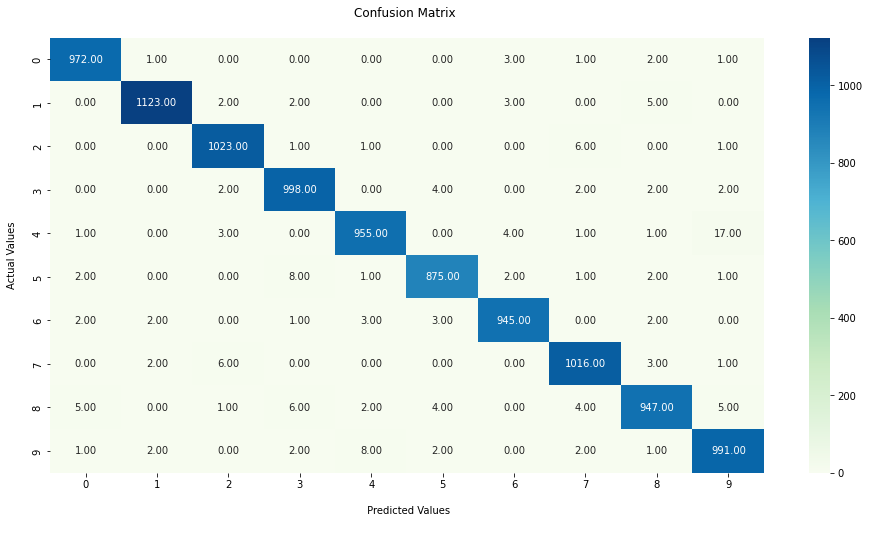

In [ ]:
plt.figure(figsize=(16,8))
fx=sns.heatmap(confusion_matrix(y_test_list,y_predict), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(n_labels)
fx.yaxis.set_ticklabels(n_labels)
plt.show()

In [ ]:
print(classification_report(y_test_list,y_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.98      0.97      0.98       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



1. The accuracy of the model is 98% with good prediction for the handwriting of number 0,1,2,6 and a slightly less accurate prediction for numbers 3, 4, 5 ,8 and 9.
2. The lowest precision score is for number 9 and lowest recall scores are for number 8 and number 4. 

### Save the model

In [ ]:
model.save('mlp_model_mnist')